<a href="https://colab.research.google.com/github/subtext2healthcare/Tips-Tricks-Useful-Code-Snippets/blob/master/color_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clever Girl: A Guide to Utilizing Color Histograms for Computer Vision and Image Search Engines

The ipython notebook and the data are in my own Google Drive, in a folder named Colab_Notebooks

The data and code used for this particular notebook is inside a subfolder named OpenCV

Since I am modifying the code as per my understanding, I will be running the code from inside the subfolder OpenCV

I will also be uploading these Notebooks to my github account to my private repository named "Tips-Tricks-Useful-Code-Snippets"

### Data Prep

In [1]:
# Mount your Google drive - This is needed, since the Notebook and Data are stored in gdrive
from google.colab import drive
drive.mount('/content/gdrive')

#!wget https://www.pyimagesearch.com/wp-content/uploads/2014/01/color-histograms.zip
#!unzip -qq color-histograms.zip
#%cd color-histograms

Mounted at /content/gdrive


In [3]:
# Use the below code line if you want to use current directory.
%cd 'gdrive/My Drive/Colab Notebooks/OpenCV/Ex2_color_histogram'

/content/gdrive/My Drive/Colab Notebooks/OpenCV/Ex2_color_histogram


In [4]:
# View Current working directory
!pwd

/content/gdrive/My Drive/Colab Notebooks/OpenCV/Ex2_color_histogram


In [5]:
# View what files are present in the folder
!ls

color_histograms.ipynb	color-histograms.zip


In [6]:
!unzip -qq 'color-histograms.zip'
%cd color-histograms

/content/gdrive/My Drive/Colab Notebooks/OpenCV/Ex2_color_histogram/color-histograms


In [7]:
!pwd

/content/gdrive/My Drive/Colab Notebooks/OpenCV/Ex2_color_histogram/color-histograms


## Blog Post Code

### Import Packages

In [8]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [9]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Using OpenCV to Compute Histograms

In [10]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required = True, help = "Path to the image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "grant.jpg"
}

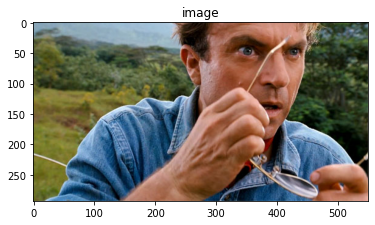

In [11]:
# load the image and show it
image = cv2.imread(args["image"])
plt_imshow("image", image)

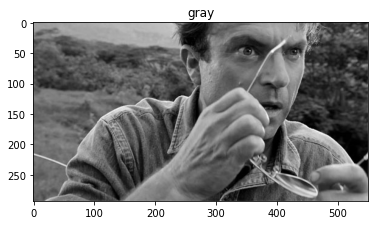

In [12]:
# convert the image to grayscale and create a histogram
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("gray", gray)

(0.0, 256.0)

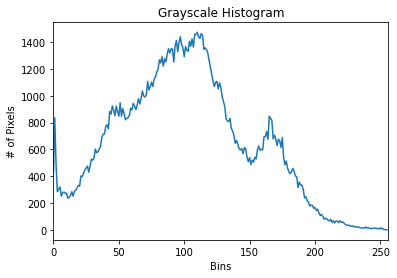

In [13]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

flattened feature vector size: 768


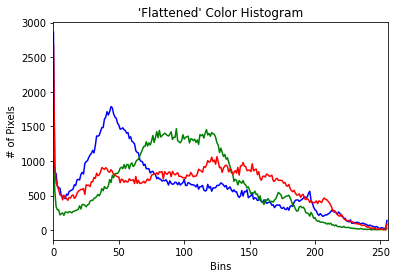

In [14]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []

# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)

	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])

# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print ("flattened feature vector size: %d" % (np.array(features).flatten().shape))

### Multi-dimensional Histograms

2D histogram shape: (32, 32), with 1024 values


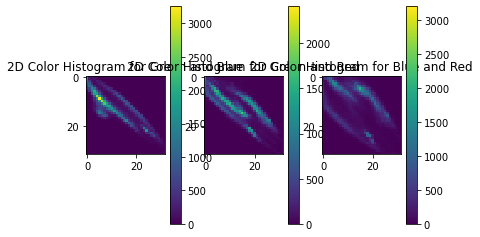

In [15]:
# let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure()

# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)

# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)

# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of
# the 2D histograms
print("2D histogram shape: %s, with %d values" % (
	hist.shape, hist.flatten().shape[0]))

In [16]:
# our 2D histogram could only take into account 2 out
# of the 3 channels in the image so now let's build a
# 3D color histogram (utilizing all channels) with 8 bins
# in each direction -- we can't plot the 3D histogram, but
# the theory is exactly like that of a 2D histogram, so
# we'll just show the shape of the histogram
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print ("3D histogram shape: %s, with %d values" % (
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Clever Girl: A Guide to Utilizing Color Histograms for Computer Vision and Image Search Engines*](https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/) published on 2014-01-22